In [1]:
import pandas as pd
import numpy as np
import re
import funciones as f #importamos el módulo de funciones funciones.py
import random

In [2]:
df = pd.read_csv("input/GSAF5.csv",encoding="ISO-8859-1")

In [3]:
#1.-Cambiamos nombres de las columnas para eliminar mayusculas, espacios y simbolos.

old_columns = df.columns
new_columns = ['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'male', 'age', 'injury', 'is_fatal', 'time',
       'species', 'investigator_or_Source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23']
aux = dict(zip(old_columns, new_columns))
df.rename(columns=aux, inplace=True)

In [4]:
print(df.shape)
df.head(2)

(5992, 24)


,case_number,date,year,type,country,area,location,activity,name,male,...,species,investigator_or_Source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN


In [5]:
#2, 3.- we delete columns ['pdf', 'href_formula', 'href','case_number_1',
#'case_number_2', 'original_order', 'unnamed_22', 'unnamed_23']because their low
#uusefullness and quantity of values

col_to_drop = ['pdf', 'href_formula', 'href','case_number_1','case_number_2', 'original_order', 'unnamed_22', 'unnamed_23']
df = df.drop(columns=col_to_drop)
print(df.shape)
df.head(3)

(5992, 16)


,case_number,date,year,type,country,area,location,activity,name,male,age,injury,is_fatal,time,species,investigator_or_Source
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016"


In [6]:
df.isnull().sum()

case_number                  0
date                         0
year                         0
type                         0
country                     43
area                       402
location                   496
activity                   527
name                       200
male                       567
age                       2681
injury                      27
is_fatal                    19
time                      3213
species                   2934
investigator_or_Source      15
dtype: int64

In [7]:
#4.-Date: year column is converted to numeric value and information before 1800 is deleted as it is considered not very legit
# date column is converted into date time. 
df["year"] = pd.to_numeric(df["year"], errors="coerce", downcast = 'integer')
df = df[df["year"]>1800]

pd.to_datetime(df["date"], errors='coerce').isnull().sum()
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["season"] = df["date"].apply(f.date_month)
df[["date", "year", "season"]].head()

,date,year,season
0,2016-09-18,2016,Fall
1,2016-09-18,2016,Fall
2,2016-09-18,2016,Fall
3,2016-09-17,2016,Fall
4,2016-09-16,2016,Fall


In [9]:
#Test for converting to season values 

val = set(df["date"].value_counts().index)
for i in val: 
    print(f.date_month(i))

Spring
Fall
Fall
Fall
Summer
Spring
Summer
Winter
Spring
Fall
Summer
Summer
Spring
Summer
Fall
Spring
Winter
Fall
Spring
Fall
Fall
Summer
Summer
Summer
Fall
Winter
Summer
Fall
Winter
Spring
Summer
Spring
Spring
Summer
Fall
Winter
Summer
Fall
Summer
Spring
Summer
Summer
Summer
Summer
Winter
Summer
Spring
Winter
Fall
Summer
Winter
Fall
Fall
Fall
Summer
Spring
Fall
Summer
Fall
Summer
Summer
Spring
Fall
Fall
Summer
Spring
Summer
Winter
Summer
Winter
Summer
Fall
Winter
Fall
Winter
Winter
Spring
Winter
Summer
Summer
Fall
Winter
Fall
Winter
Summer
Fall
Fall
Spring
Winter
Summer
Fall
Winter
Summer
Fall
Fall
Summer
Summer
Spring
Winter
Summer
Summer
Summer
Spring
Winter
Fall
Fall
Spring
Winter
Summer
Winter
Summer
Summer
Fall
Spring
Winter
Spring
Summer
Fall
Fall
Spring
Summer
Spring
Fall
Fall
Summer
Fall
Winter
Winter
Fall
Fall
Spring
Fall
Fall
Summer
Fall
Winter
Fall
Spring
Winter
Winter
Fall
Spring
Summer
Spring
Summer
Summer
Summer
Fall
Summer
Fall
Fall
Summer
Summer
Winter
Fall
Summer
Summ

Spring
Spring
Spring
Winter
Spring
Winter
Spring
Winter
Summer
Winter
Spring
Winter
Spring
Spring
Winter
Summer
Winter
Fall
Summer
Spring
Fall
Winter
Summer
Spring
Winter
Winter
Fall
Fall
Fall
Winter
Spring
Summer
Winter
Winter
Summer
Fall
Winter
Spring
Spring
Summer
Spring
Spring
Winter
Spring
Fall
Spring
Fall
Fall
Fall
Winter
Summer
Summer
Summer
Spring
Winter
Fall
Summer
Summer
Winter
Winter
Spring
Winter
Summer
Winter
Fall
Fall
Summer
Summer
Fall
Summer
Summer
Summer
Fall
Fall
Summer
Spring
Winter
Winter
Winter
Spring
Summer
Fall
Spring
Fall
Summer
Fall
Winter
Summer
Summer
Summer
Summer
Fall
Winter
Spring
Fall
Winter
Spring
Winter
Winter
Winter
Fall
Fall
Winter
Fall
Spring
Spring
Summer
Fall
Fall
Fall
Spring
Winter
Fall
Summer
Summer
Summer
Spring
Spring
Fall
Fall
Fall
Spring
Summer
Winter
Summer
Winter
Winter
Winter
Winter
Winter
Winter
Winter
Summer
Fall
Spring
Winter
Spring
Summer
Spring
Summer
Fall
Summer
Summer
Winter
Winter
Fall
Winter
Fall
Summer
Winter
Spring
Fall
Fall
Win

Spring
Winter
Summer
Summer
Fall
Summer
Fall
Spring
Summer
Fall
Winter
Fall
Summer
Summer
Summer
Fall
Spring
Fall
Fall
Fall
Summer
Fall
Winter
Spring
Fall
Winter
Winter
Summer
Winter
Fall
Fall
Summer
Spring
Summer
Fall
Summer
Winter
Spring
Winter
Fall
Winter
Winter
Spring
Summer
Spring
Winter
Spring
Winter
Fall
Summer
Winter
Summer
Winter
Summer
Summer
Fall
Fall
Spring
Winter
Summer
Spring
Summer
Summer
Summer
Winter
Winter
Summer
Fall
Winter
Winter
Winter
Fall
Summer
Winter
Fall
Winter
Spring
Summer
Spring
Spring
Spring
Fall
Winter
Spring
Spring
Fall
Fall
Summer
Winter
Winter
Spring
Fall
Summer
Summer
Winter
Fall
Winter
Winter
Fall
Fall
Winter
Spring
Winter
Summer
Summer
Spring
Winter
Winter
Fall
Summer
Summer
Fall
Fall
Spring
Spring
Summer
Summer
Summer
Summer
Summer
Winter
Spring
Winter
Spring
Winter
Spring
Fall
Fall
Winter
Summer
Spring
Fall
Summer
Winter
Fall
Fall
Winter
Winter
Spring
Winter
Spring
Winter
Fall
Fall
Summer
Winter
Spring
Spring
Spring
Summer
Summer
Fall
Summer
Winte

In [66]:
#Eliminating date null values by predicting with year value and season probability
season_prob = df["season"].value_counts().values[:-1]/sum(df["season"].value_counts().values[:-1])

no_date_index = df.loc[df["date"].isnull()].index

for row in no_date_index: 
    df.at[row,"date"] = f.year_to_date_with_season(df.at[row, "year"],season_prob)

In [11]:
#Run again for df["season"]
df["season"] = df["date"].apply(f.date_month)

In [12]:
#5.- Age: Age is convert with pandas to_numeric function to integer. If error, converted into NAN value. NaN values are saved 
#for future decision: drop or value prediction. Or even better and more dedicated transformation method

df['age'] = pd.to_numeric(df['age'], errors = 'coerce', downcast = 'integer')
print("Different. age values: ", df["age"].value_counts().sum())

Different. age values:  3196


In [13]:
#Not considering null age values
df = df[df["age"].notnull()]

In [14]:
#6.- male (sex): convert to True if male and False if Female. Other values are return as NaN
set(df["male"].value_counts().index)

{'F', 'M', 'M ', 'lli'}

In [15]:
#Function TEST 
val = list(df["male"].value_counts().index)
print(val)
for i in val:
    print(f.ismale(i))

['M', 'F', 'lli', 'M ']
True
False
nan
True


In [16]:
df["male"] = df["male"].apply(f.ismale)

In [17]:
#Not considering null male values
df = df[df["male"].notnull()]

In [18]:
#7.- We arrange fatal column to future analysis 

df["is_fatal"] = df["is_fatal"].apply(f.isfatal)
print(df["is_fatal"].value_counts())

False    2506
True      655
Name: is_fatal, dtype: int64


In [19]:
#8.- We create new column with time mapping 
print(df["time"].shape)
df["time"].isnull().sum()

(3161,)


983

In [20]:
#set(list(df["time"].apply(cat_hour).value_counts().index))
cat = ["Night","Morning", "Mid morning", "Mid day", "Afternoon", "Evening", "Nightfall", "Night2", "Uncategorized"]
cutoffs = [0,7,10,12,15,17,20,22,24,26]
a = df["time"].apply(f.cat_hour)
df["time_aux"] = pd.cut(a,cutoffs,labels = cat)
df["time_aux"].value_counts()

Uncategorized    1109
Mid day           709
Mid morning       369
Afternoon         353
Morning           300
Evening           181
Night             129
Nightfall           7
Night2              3
Name: time_aux, dtype: int64

In [21]:
df.isnull().sum()

case_number                  0
date                         0
year                         0
type                         0
country                      7
area                       100
location                   132
activity                   120
name                         9
male                         0
age                          0
injury                       4
is_fatal                     0
time                       983
species                   1216
investigator_or_Source       5
season                       0
time_aux                     1
dtype: int64

In [60]:
#Save cleaner data set to CSV
df.to_csv("output/shark_clean.csv")

## Hypothesis: in the USA more attacks during summer season

In [48]:
df_hyp_one = df[(df["country"]=="USA") & (df["season"] != "Undefined")][[ "season"]]

df_hyp_one_f = pd.DataFrame({'Season':list(df["season"].value_counts().index), 'attacks':list(df["season"].value_counts())})

In [49]:
print(list(df["season"].value_counts().index))
list(df["season"].value_counts())

['Summer', 'Fall', 'Winter', 'Spring']


[1005, 770, 718, 668]

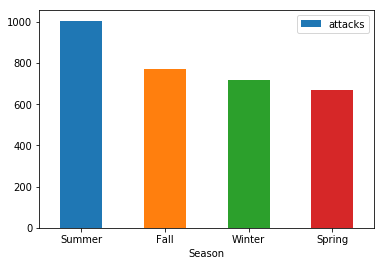

In [59]:
ax = df_hyp_one_f.plot.bar(x='Season', y='attacks', rot = 0)

In [ ]:
pd.df_hyp_one.plot()